In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from src.plot_settings import (
    ps_defaults,
    label_subplots,
    get_dim,
    set_dim,
    PALETTE,
    STD_CLR_LIST,
    CAM_BLUE,
    BRICK_RED,
    OX_BLUE,
)
ps_defaults(use_tex=True, dpi=300)

In [15]:
from src.read_in_data import get_s
import xarray as xr

In [47]:
sin_ds = get_s(name="s.in")

1.3.1
['Sea', 'Surface', 'Temperature', '(C)']
['p', '(hPa)', 'T', '(C)', 'q', '(g/Kg)']
['-------', '-----', '--------']
['1000.0', '23.451', '14.707336']
['975.0', '21.315', '14.458715']
['950.0', '19.140', '14.344968']
['925.0', '17.972', '11.381991']
['900.0', '16.941', '9.894473']
['875.0', '15.872', '8.827264']
['850.0', '14.763', '8.029092']
['825.0', '13.612', '7.440928']
['800.0', '12.415', '7.022137']
['775.0', '11.169', '6.684999']
['750.0', '9.868', '6.348746']
['725.0', '8.508', '5.997359']
['700.0', '7.114', '5.675086']
['675.0', '5.588', '5.343468']
['650.0', '4.014', '5.002264']
['625.0', '2.353', '4.561996']
['600.0', '0.594', '3.937707']
['575.0', '-1.277', '3.339196']
['550.0', '-3.272', '2.781408']
['525.0', '-5.408', '2.277385']
['500.0', '-7.702', '1.835653']
['475.0', '-10.178', '1.455985']
['450.0', '-12.863', '1.134831']
['425.0', '-15.787', '0.867488']
['400.0', '-18.987', '0.646897']
['375.0', '-22.504', '0.465145']
['350.0', '-26.384', '0.304908']
['325.0', 

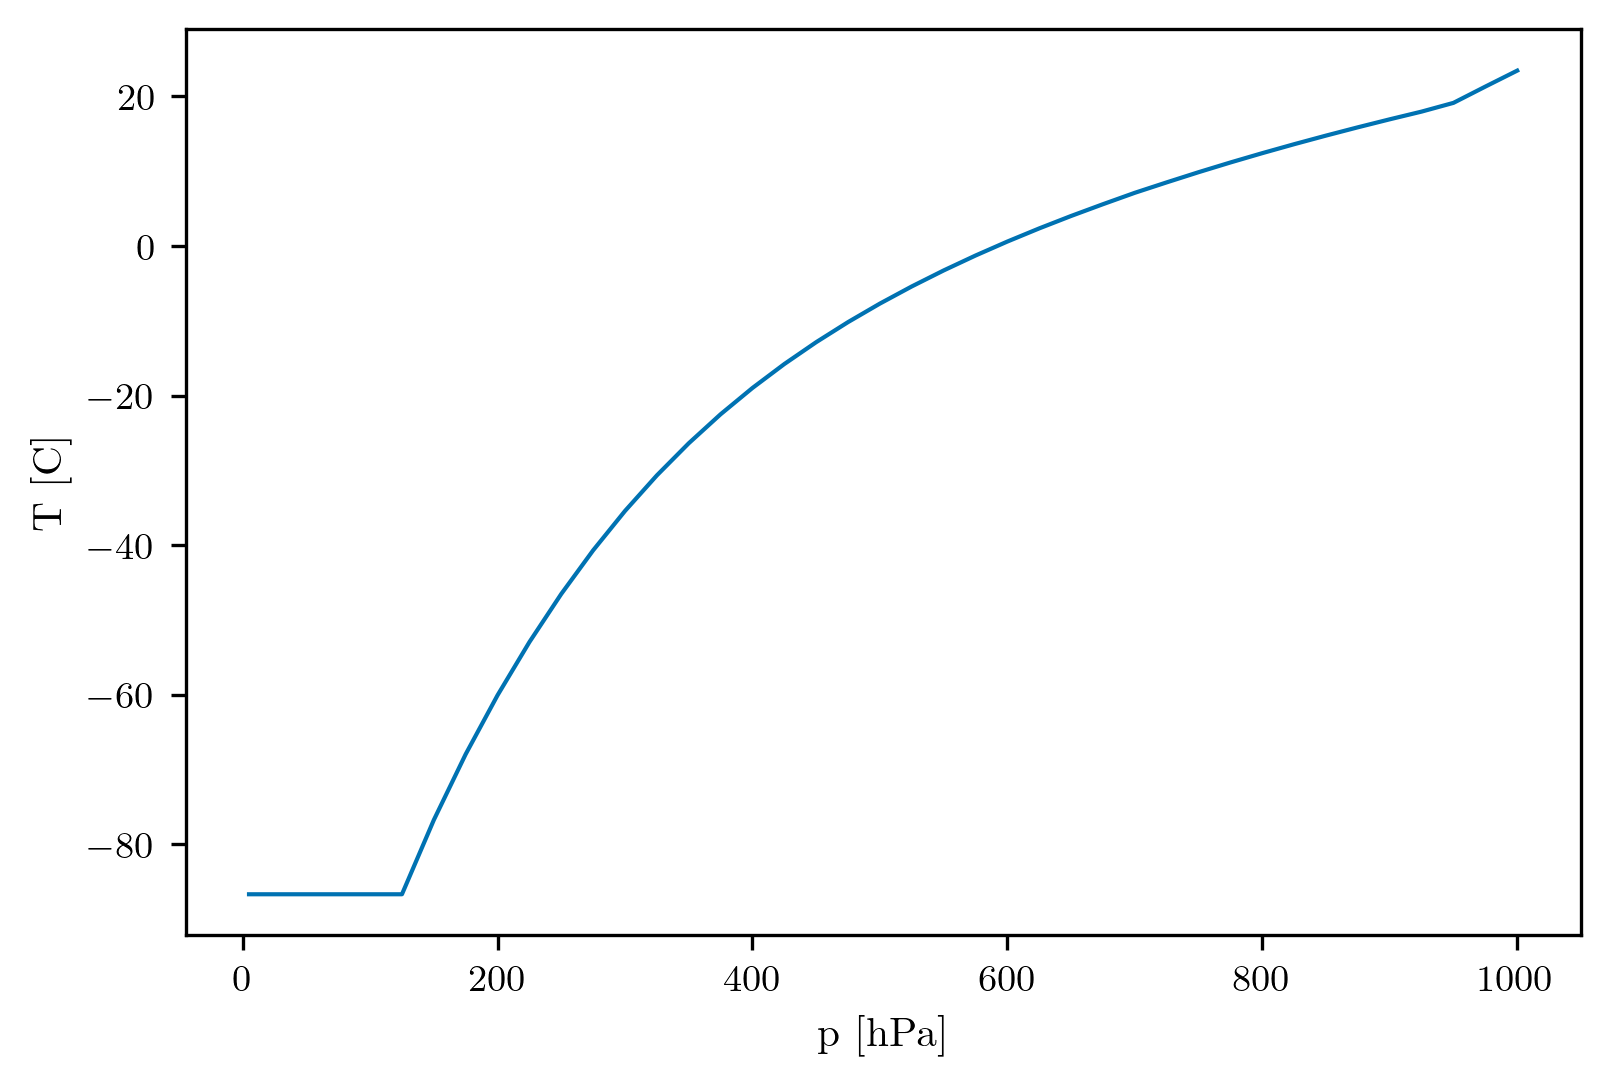

In [49]:
sin_ds.T.plot()

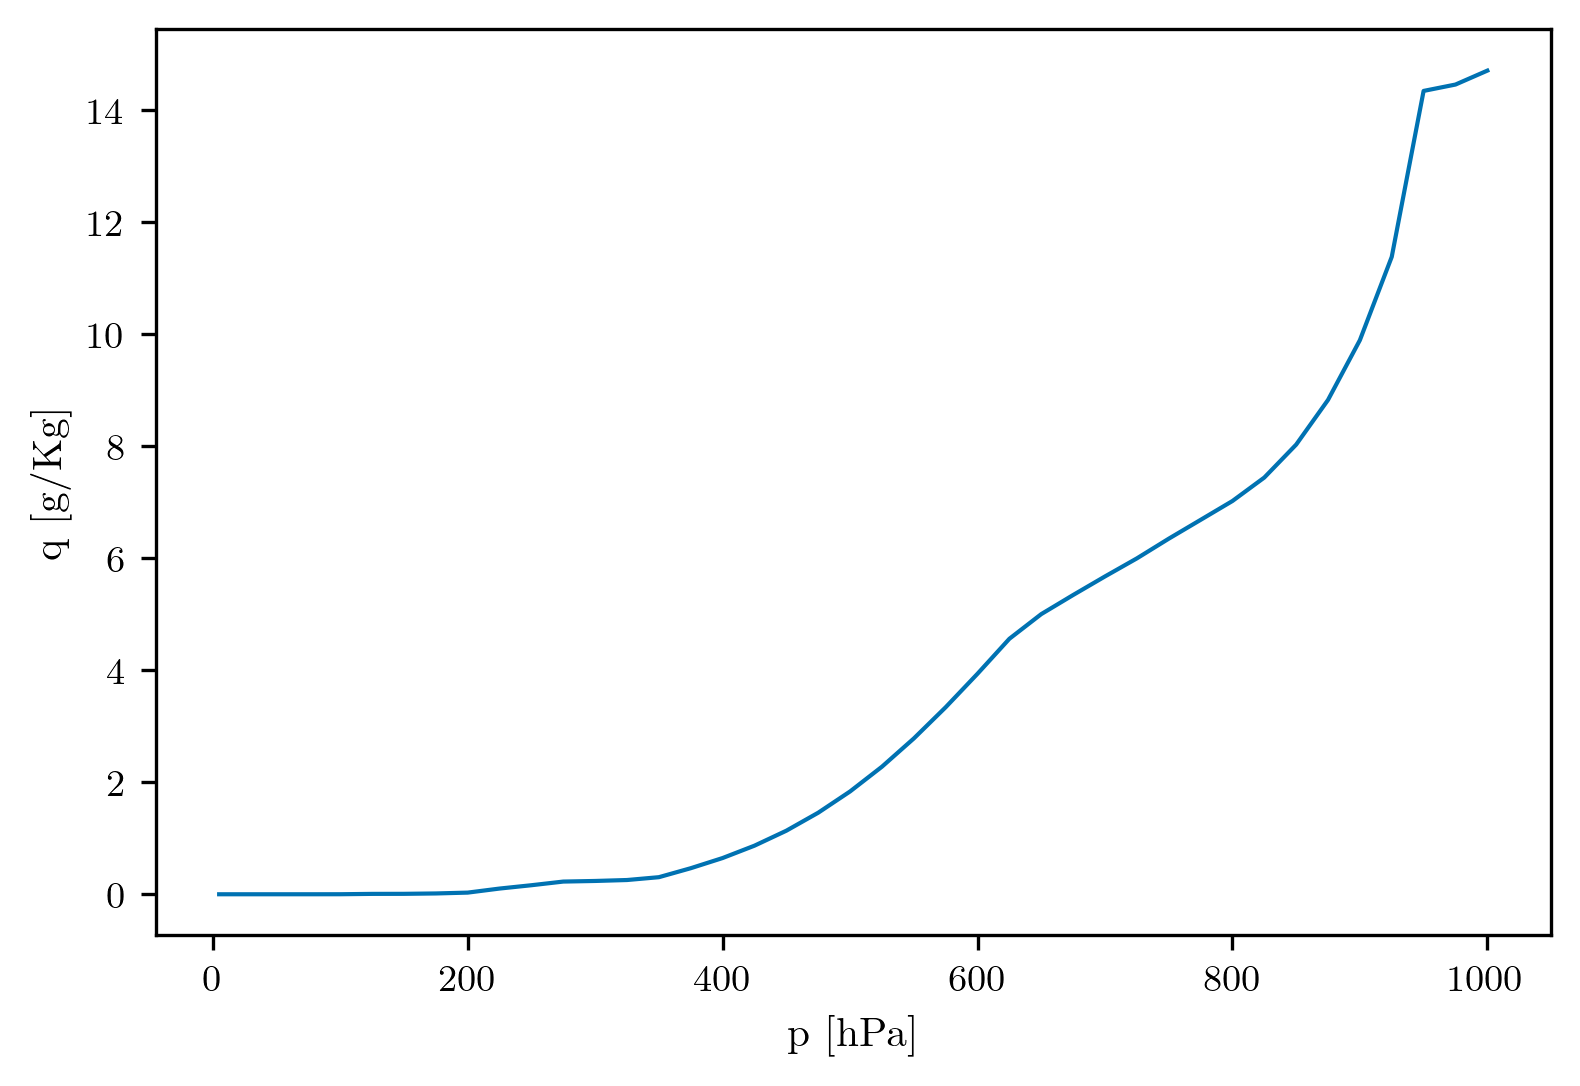

In [51]:
sin_ds.q.plot()

In [20]:
sin_npa[:, 1]

array(['23.451', '21.315', '19.140', '17.972', '16.941', '15.872',
       '14.763', '13.612', '12.415', '11.169', '9.868', '8.508', '7.114',
       '5.588', '4.014', '2.353', '0.594', '-1.277', '-3.272', '-5.408',
       '-7.702', '-10.178', '-12.863', '-15.787', '-18.987', '-22.504',
       '-26.384', '-30.677', '-35.433', '-40.700', '-46.529', '-52.967',
       '-60.080', '-67.961', '-76.761', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696', '-86.696', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696'], dtype='<U9')

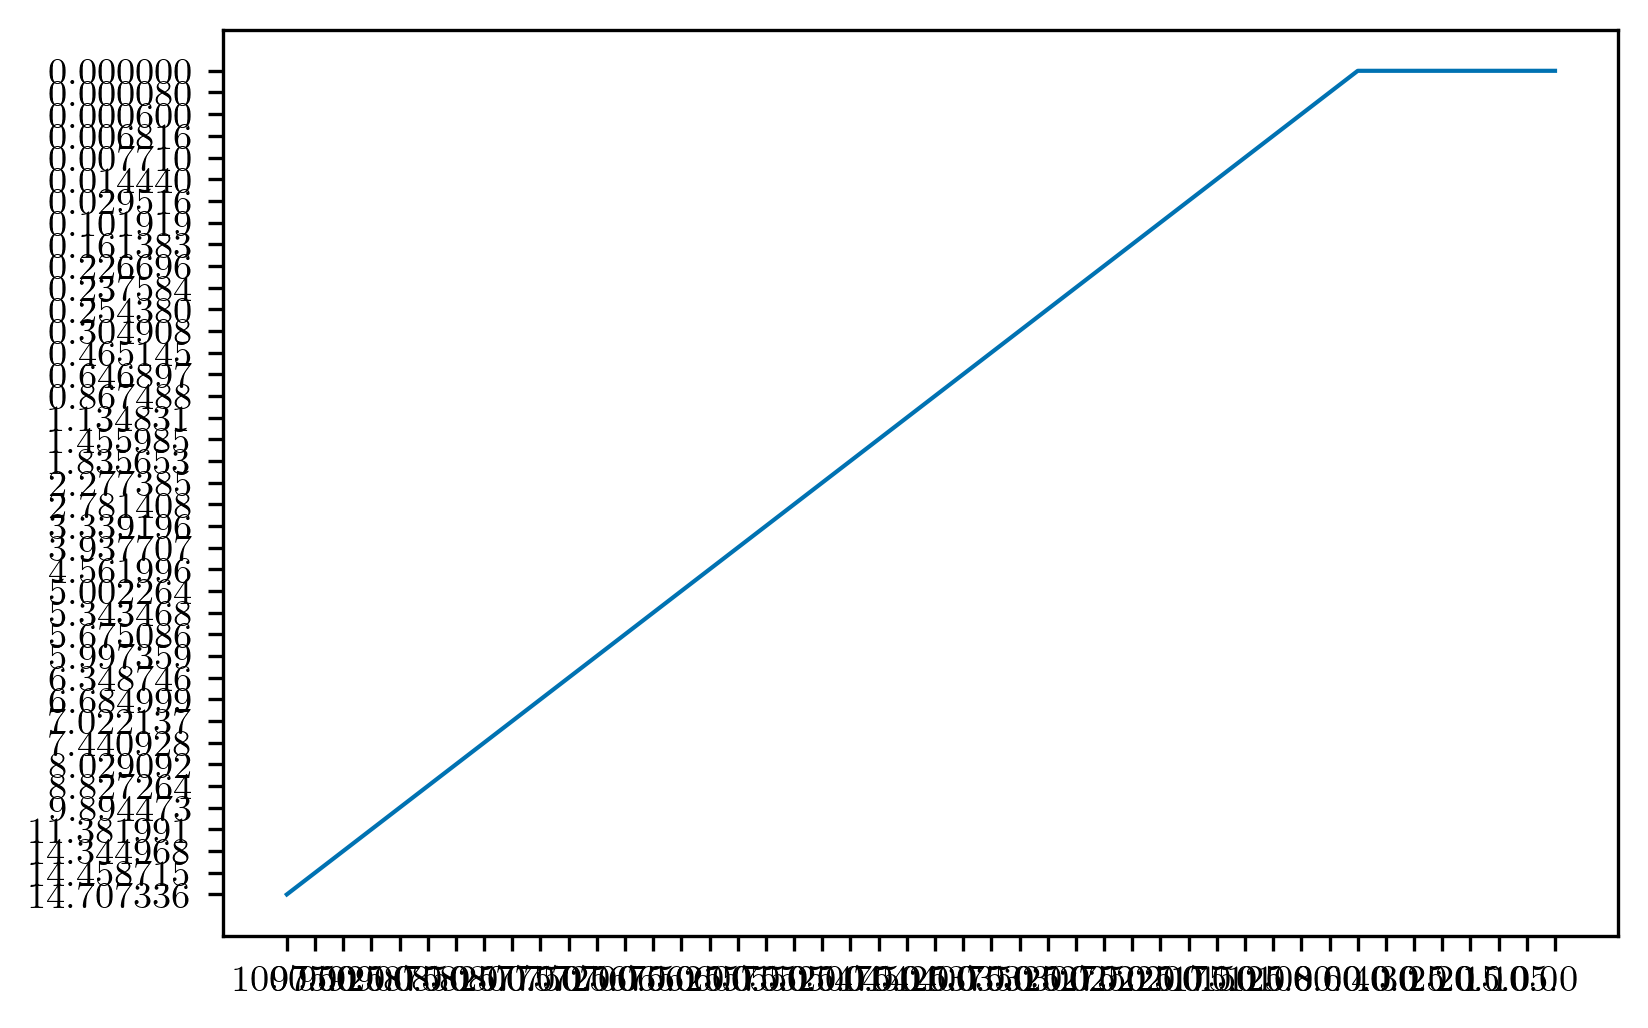

In [22]:
plt.plot(sin_npa[:, 0], sin_npa[:, 2])

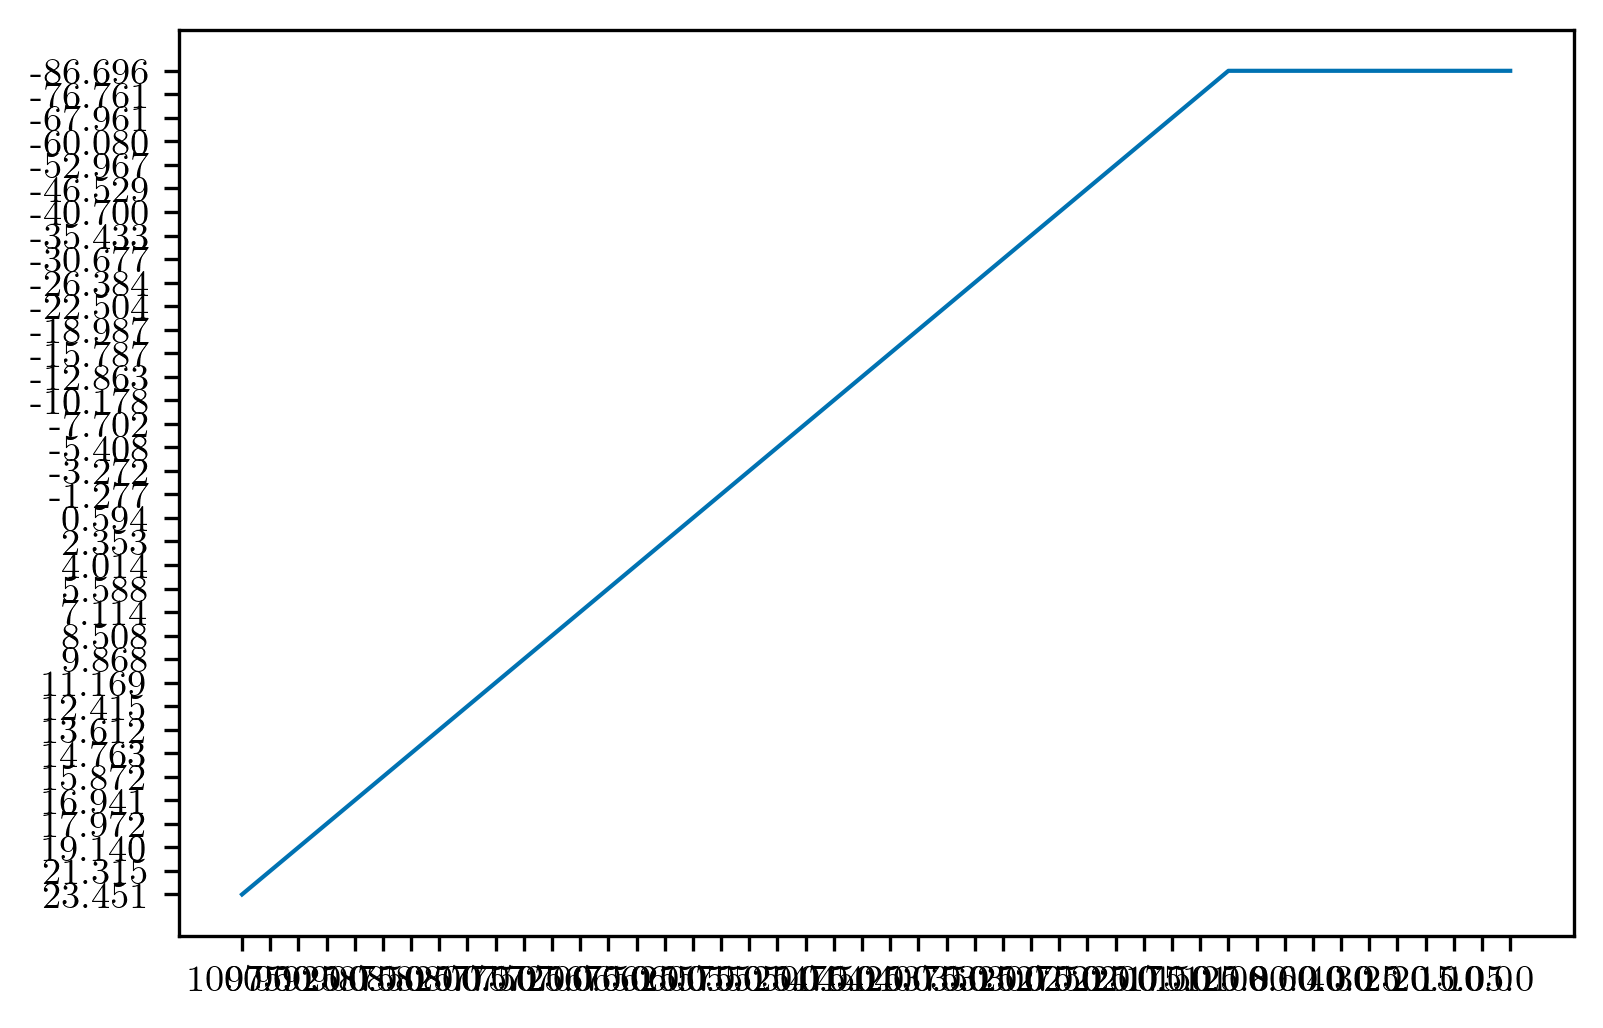

In [23]:
plt.plot(sin_npa[:, 0], sin_npa[:, 1])

In [42]:
ds = xr.Dataset(
    data_vars={
        names[1]: (names[0], sin_npa[:, 1]),
        names[2]: (names[0], sin_npa[:, 2]),
    },
    coords={names[0]: sin_npa[:, 0]},
    attrs={"description": "s.in."},
)
for i in range(len(names)):
    ds[names[i]].attrs["units"] = units[i]

In [43]:
ds

<xarray.Dataset>
Dimensions:  (p: 46)
Coordinates:
  * p        (p) <U9 '1000.0' '975.0' '950.0' '925.0' ... '15.0' '10.0' '5.0'
Data variables:
    T        (p) <U9 '23.451' '21.315' '19.140' ... '-86.696' '-86.696'
    q        (p) <U9 '14.707336' '14.458715' ... '0.000000' '0.000000'
Attributes:
    description:  s.in.

In [40]:
ds["p"].attrs["units"] = "P"

In [41]:
ds

<xarray.Dataset>
Dimensions:  (p: 46)
Coordinates:
  * p        (p) <U9 '1000.0' '975.0' '950.0' '925.0' ... '15.0' '10.0' '5.0'
Data variables:
    T        (p) <U9 '23.451' '21.315' '19.140' ... '-86.696' '-86.696'
    q        (p) <U9 '14.707336' '14.458715' ... '0.000000' '0.000000'
Attributes:
    description:  s.in.

In [36]:
ds

<xarray.Dataset>
Dimensions:  (p: 46)
Coordinates:
  * p        (p) <U9 '1000.0' '975.0' '950.0' '925.0' ... '15.0' '10.0' '5.0'
Data variables:
    T        (p) <U9 '23.451' '21.315' '19.140' ... '-86.696' '-86.696'
    q        (p) <U9 '14.707336' '14.458715' ... '0.000000' '0.000000'
Attributes:
    description:  s.in.

In [ ]:
ds = xr.Dataset(
    data_vars=dict(
        temperature=(["x", "y", "time"], temperature),
        precipitation=(["x", "y", "time"], precipitation),
    ),
    coords=dict(
        lon=(["x", "y"], lon),
        lat=(["x", "y"], lat),
        time=time,
        reference_time=reference_time,
    ),
    attrs=dict(description="Weather related data."),
)

In [ ]:
xr = xr.Datarray()

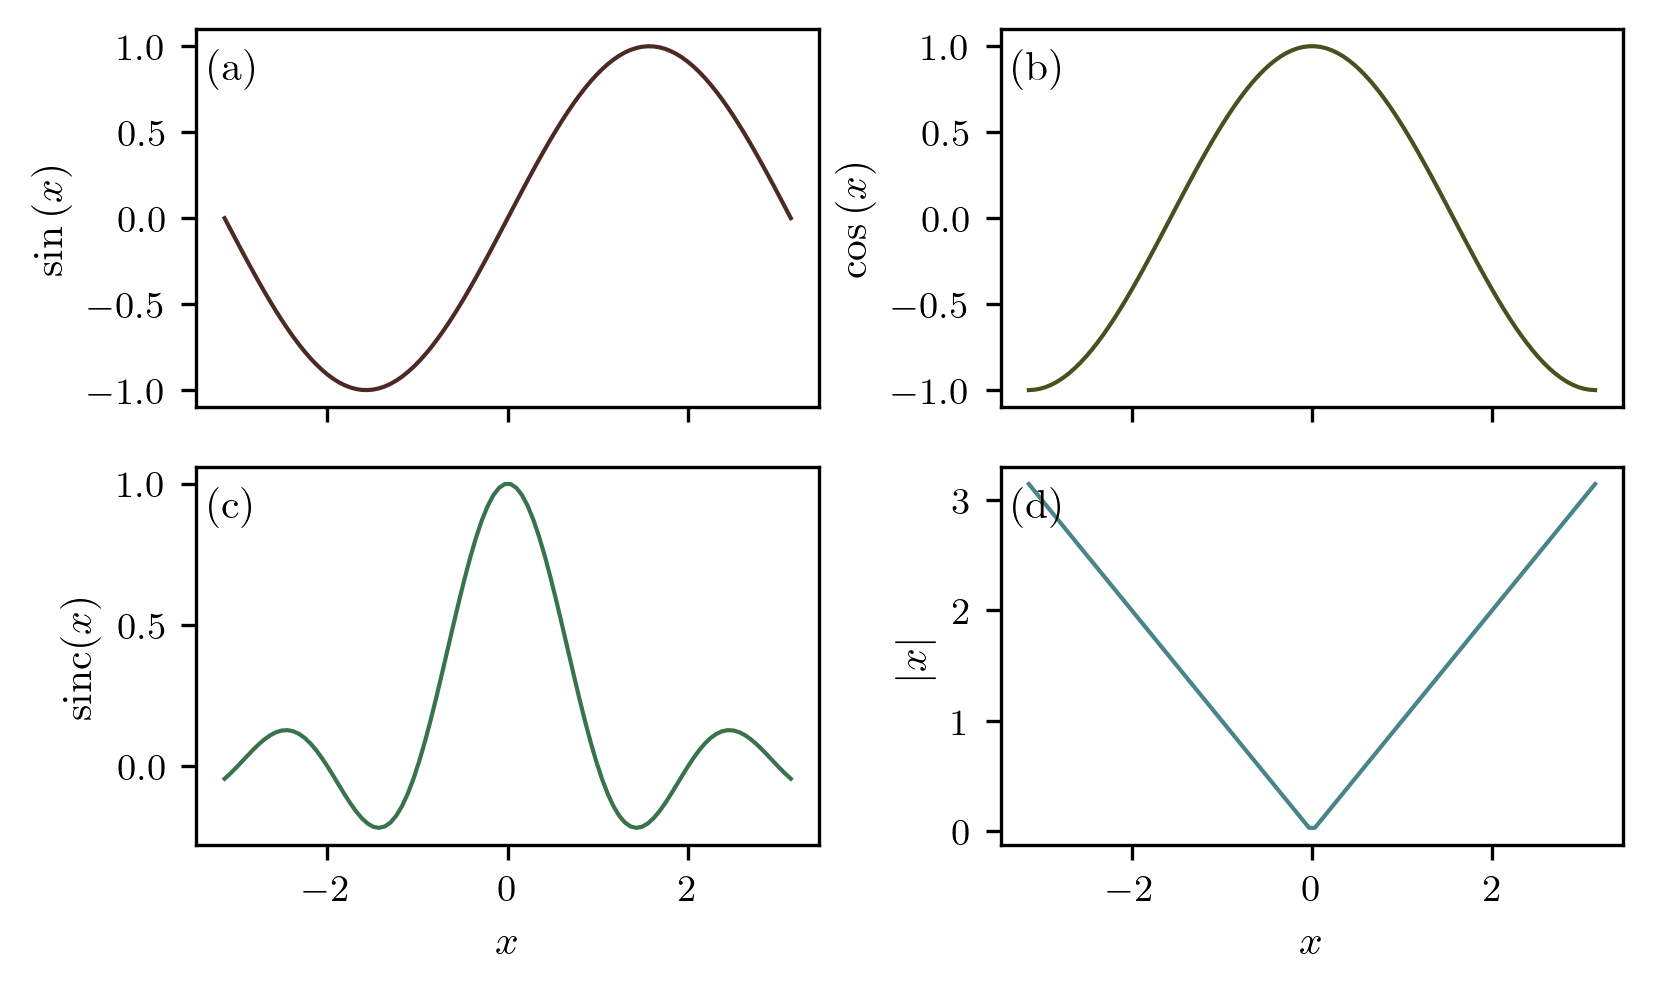

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True)

x = np.linspace(-np.pi, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=STD_CLR_LIST[0])
axs[0, 1].plot(x, np.cos(x), color=STD_CLR_LIST[1])
axs[1, 0].plot(x, np.sinc(x), color=STD_CLR_LIST[2])
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[3])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")
axs[1, 1].set_xlabel(r"$x$")
axs[1, 0].set_xlabel(r"$x$")


set_dim(fig, fraction_of_line_width=1, ratio=(5 ** 0.5 - 1) / 2)
label_subplots(axs, start_from=0, fontsize=10)
plt.tight_layout()
plt.show()

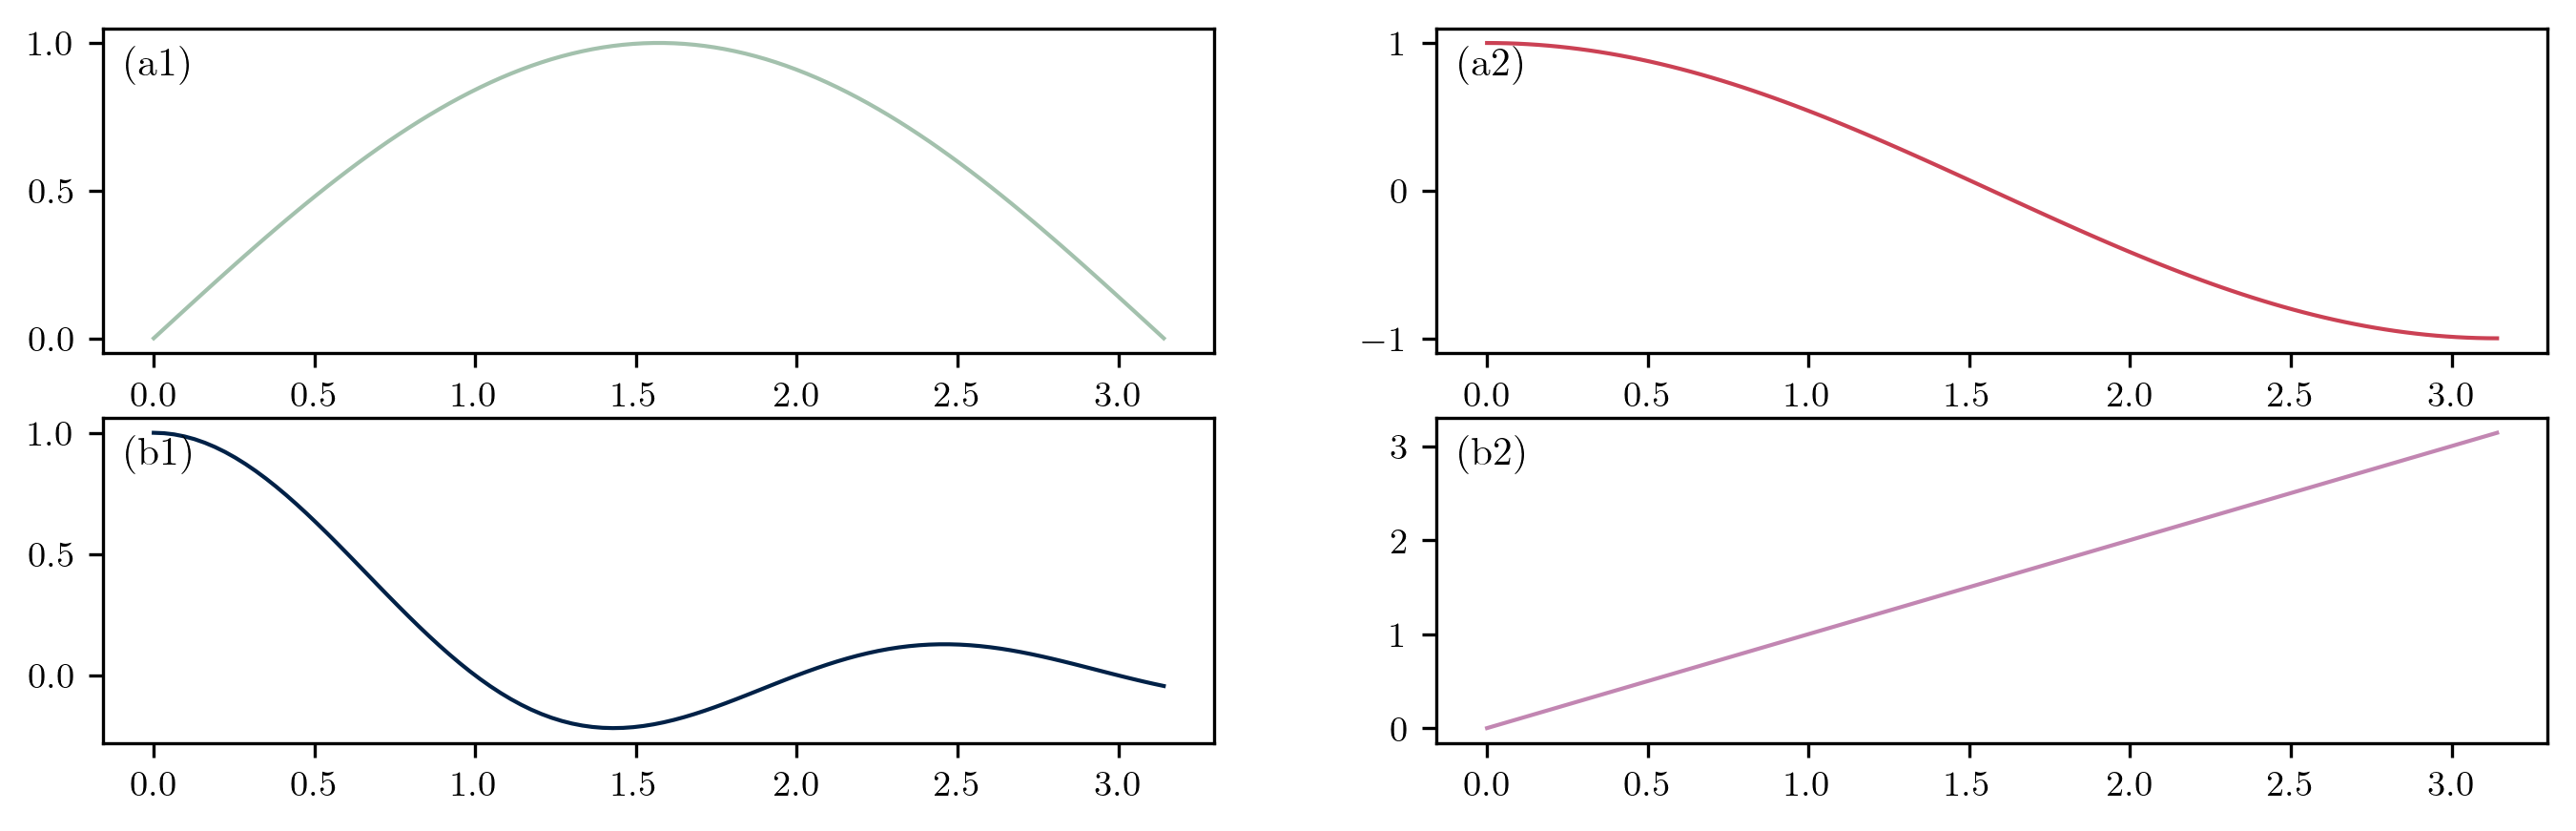

In [11]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(axs, labels=["a1", "a2", "b1", "b2"], start_from=0, fontsize=10)
plt.show()

In [5]:
ps_defaults(use_tex=False)

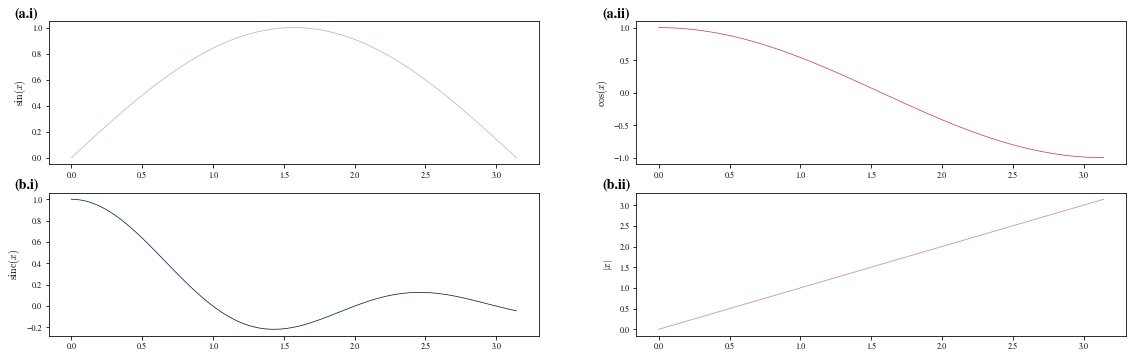

In [9]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(
    axs, labels=["a.i", "a.ii", "b.i", "b.ii"], 
    start_from=0, x_pos=-0.07, y_pos=1.1, fontsize=14
)